## Compare H1 data and MC for DIS DNN

In [1]:
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from matplotlib.colors import LogNorm
from matplotlib import rc
from numpy import inf
import os

from os import listdir


import uproot3

import matplotlib as mpl

from datetime import datetime
import subprocess

mpl.rcParams.update({'font.size': 19})
mpl.rcParams.update({'xtick.labelsize': 18}) 
mpl.rcParams.update({'ytick.labelsize': 18}) 
mpl.rcParams.update({'text.usetex' : False})
mpl.rcParams.update({'axes.labelsize': 18}) 
mpl.rcParams.update({'legend.frameon': False})

/Users/owen/.pyenv/versions/3.8.1/lib/python3.8/site-packages/pandas/compat/__init__.py:109: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [2]:
%%time

data_fname = '/Volumes/Ext_2020_08/dis-reco-work/h1-2021-10-14-v5f/dnn-output-h1-v2-Data.root'
mc_fname   = '/Volumes/Ext_2020_08/dis-reco-work/h1-2021-10-14-v5f/dnn-output-h1-v2-Rapgap.root'

max_evts = 100000
max_evts = 1e9

plots_dir = 'plots-data-mc-comp'

try:
    os.mkdir( plots_dir )
except:
    print('\n\n Plots output dir already exists: %s\n\n' % plots_dir )
        

data_file = uproot3.open( data_fname )

mc_file = uproot3.open( mc_fname )

data_tt = data_file['dnnout']

mc_tt = mc_file['dnnout']

print('\n\n === Data:')
data_tt.show()

print('\n\n === MC:')
mc_tt.show()

print('\n\n')

print(' Loading pandas data frames...')

data_pdf = data_tt.pandas.df( ['*'], entrystop = max_evts,  flatten=True )

print('\n\n  Entries read from data: %d' % data_pdf.shape[0] )

mc_pdf   =   mc_tt.pandas.df( ['*'], entrystop = max_evts,  flatten=True )

print('\n\n  Entries read from mc:   %d' % mc_pdf.shape[0] )



 Plots output dir already exists: plots-data-mc-comp




 === Data:
tower_sum_40               (no streamer)              asdtype('>f4')
n_towers_40                (no streamer)              asdtype('>i8')
eta_pho_closest_to_ebeam   (no streamer)              asdtype('>f4')
e_pho_closest_to_ebeam     (no streamer)              asdtype('>f8')
phi_pho_closest_to_ebeam   (no streamer)              asdtype('>f4')
obs_x_e                    (no streamer)              asdtype('>f4')
obs_x_E0ESigma             (no streamer)              asdtype('>f4')
obs_x_E0ThetaSigma         (no streamer)              asdtype('>f4')
obs_x_DA                   (no streamer)              asdtype('>f4')
obs_x_h                    (no streamer)              asdtype('>f4')
obs_x_ISigma               (no streamer)              asdtype('>f4')
obs_x_IDA                  (no streamer)              asdtype('>f4')
obs_x_ThetaSigmagamma      (no streamer)              asdtype('>f4')
obs_x_eSigma               (no st



  Entries read from data: 334093


  Entries read from mc:   12427320
CPU times: user 35.2 s, sys: 19.2 s, total: 54.4 s
Wall time: 3min 11s


In [3]:
data_pdf

,tower_sum_40,n_towers_40,eta_pho_closest_to_ebeam,e_pho_closest_to_ebeam,phi_pho_closest_to_ebeam,obs_x_e,obs_x_E0ESigma,obs_x_E0ThetaSigma,obs_x_DA,obs_x_h,...,rot_Empz1,rot_Empz2,e_ecal_over_trk_ratio,dphi_pho_closest_to_ebeam,obs_ptbal,obs_pzbal,obs_hfs_theta,dnn_x,dnn_y,dnn_Q2
entry,,,,,,,,,,,,,,,,,,,,,
0,29.539917,1,1.586339,0.620679,-2.141181,0.064867,0.065679,0.066477,0.066568,0.066660,...,-34.395432,38.994225,1.167353,2.883773,0.002832,0.001373,0.211127,0.068873,0.057185,398.544708
1,17.600971,1,-1.501508,0.207031,-0.882908,0.004332,0.000905,0.005333,0.006080,0.006931,...,-7.910134,37.102695,0.911164,1.633785,0.192576,0.049815,0.167183,0.005456,0.368909,203.977905
2,13.357138,1,-0.486105,0.237489,2.722782,0.002175,-0.008476,0.004050,0.002123,0.001113,...,-1.594026,33.038288,0.906515,3.300904,-0.416346,0.153903,0.142871,0.003256,0.511354,166.516693
3,29.979208,1,0.831776,0.162536,-2.678390,0.269964,0.103943,0.081128,0.084840,0.088721,...,-37.267128,39.989891,1.112879,2.758377,0.019843,-0.024125,0.171068,0.094625,0.030153,288.604614
4,22.995451,1,0.343132,0.208611,-1.802744,0.011049,0.006301,0.014806,0.009795,0.006480,...,-20.462963,36.982399,1.123295,1.720057,-0.410153,0.052895,0.345670,0.010280,0.279865,288.396088
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
334088,22.589336,1,0.787942,0.270214,2.960237,0.010111,0.007526,0.011918,0.008496,0.006057,...,-18.867622,37.818779,1.054758,3.653934,-0.344390,0.031476,0.209347,0.009034,0.297834,271.910004
334089,26.170691,1,0.978893,0.413356,-0.984573,0.015146,0.008821,0.022334,0.019404,0.016858,...,-32.055866,37.823284,1.081360,1.545814,-0.112060,0.031361,0.397858,0.021121,0.085438,181.007553
334090,23.882811,1,0.060480,0.815322,0.434041,0.008959,0.001397,0.012938,0.010056,0.007815,...,-26.005192,37.064381,1.088944,2.770775,-0.210511,0.050796,0.414763,0.010024,0.182628,183.910080


In [4]:
mc_pdf

,has_isr,has_fsr,tower_sum_40,n_towers_40,eta_pho_closest_to_ebeam,e_pho_closest_to_ebeam,phi_pho_closest_to_ebeam,obs_x_e,obs_x_E0ESigma,obs_x_E0ThetaSigma,...,rot_Empz1,rot_Empz2,e_ecal_over_trk_ratio,dphi_pho_closest_to_ebeam,obs_ptbal,obs_pzbal,obs_hfs_theta,dnn_x,dnn_y,dnn_Q2
entry,,,,,,,,,,,,,,,,,,,,,
0,0,0,24.247692,1,-0.182699,0.144760,2.422777,0.015283,0.019567,0.009369,...,-15.735563,43.001450,1.071315,0.428013,0.060719,-0.101689,0.199275,0.013015,0.281035,366.625977
1,0,1,13.348120,1,-1.709016,0.566964,-0.436204,0.003809,0.002255,0.004362,...,5.847350,37.739708,0.988650,2.755722,-0.035760,0.033116,0.167778,0.003950,0.584270,233.372925
2,0,0,25.104801,1,-0.021559,1.420366,2.370969,0.013934,0.019074,0.008570,...,-22.754414,42.132053,2.409008,3.302941,0.168212,-0.079415,0.655319,0.011291,0.202730,233.160248
3,0,1,20.143602,1,0.018809,0.729400,-1.816074,0.007061,0.004471,0.008294,...,-12.849410,37.633305,1.761387,2.691795,0.091957,0.035842,0.336323,0.007730,0.333578,257.691833
4,1,0,32.968731,1,0.195189,0.114277,0.189013,0.092370,0.113946,0.127623,...,-32.666924,38.093636,0.950580,3.264253,0.052082,0.024048,0.183131,0.155665,0.058885,926.202881
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12427315,0,0,26.402330,1,0.174245,0.566415,2.864766,0.024454,0.025220,0.020039,...,-19.238663,40.501198,4.000000,3.087824,0.021586,-0.037633,0.955500,0.021070,0.263811,566.572632
12427316,0,0,28.854366,3,1.585496,0.847493,-0.978673,0.031226,0.033230,0.085853,...,-35.470558,37.430954,4.000000,3.580083,0.082591,0.041026,0.190434,0.069176,0.033292,229.412354
12427317,0,0,20.172613,1,-0.271558,2.526228,-2.976105,0.007184,0.004763,0.008364,...,-12.734643,37.707119,1.047844,2.608182,-0.055354,0.033951,0.277662,0.007092,0.355807,255.544235


### Add derived variables here

In [5]:

data_pdf.eval('obs_e_theta = arctan2(obs_e_pt,obs_e_pz)', inplace=True )
mc_pdf.eval('obs_e_theta = arctan2(obs_e_pt,obs_e_pz)', inplace=True )

data_pdf['obs_e_eta'] = -1. * np.log( np.tan( data_pdf['obs_e_theta']/2. ) )
mc_pdf['obs_e_eta'] = -1. * np.log( np.tan( mc_pdf['obs_e_theta']/2. ) )



data_pdf.eval('obs_hfs_theta = arctan2(obs_hfs_pt,obs_hfs_pz)', inplace=True )
mc_pdf.eval('obs_hfs_theta = arctan2(obs_hfs_pt,obs_hfs_pz)', inplace=True )

data_pdf['obs_hfs_eta'] = -1. * np.log( np.tan( data_pdf['obs_hfs_theta']/2. ) )
mc_pdf['obs_hfs_eta'] = -1. * np.log( np.tan( mc_pdf['obs_hfs_theta']/2. ) )


data_pdf.eval('obs_e_Sigma = obs_e_e - obs_e_pz', inplace=True )
mc_pdf.eval('obs_e_Sigma = obs_e_e - obs_e_pz', inplace=True )

data_pdf.eval('obs_hfs_Sigma = obs_hfs_e - obs_hfs_pz', inplace=True )
mc_pdf.eval('obs_hfs_Sigma = obs_hfs_e - obs_hfs_pz', inplace=True )





In [6]:
data_pdf[['obs_e_eta','obs_e_theta']]

,obs_e_eta,obs_e_theta
entry,,
0,-0.988572,2.429127
1,-1.122276,2.512156
2,-1.199109,2.555996
3,-1.163658,2.536112
4,-1.011633,2.444071
...,...,...
334088,-1.031318,2.456620
334089,-1.412705,2.663920
334090,-1.322172,2.620595


### Make event selection here

In [7]:
data_pdf = data_pdf.query('obs_Q2_e > 220')
mc_pdf = mc_pdf.query('obs_Q2_e > 220')

/Users/owen/.pyenv/versions/3.8.1/lib/python3.8/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


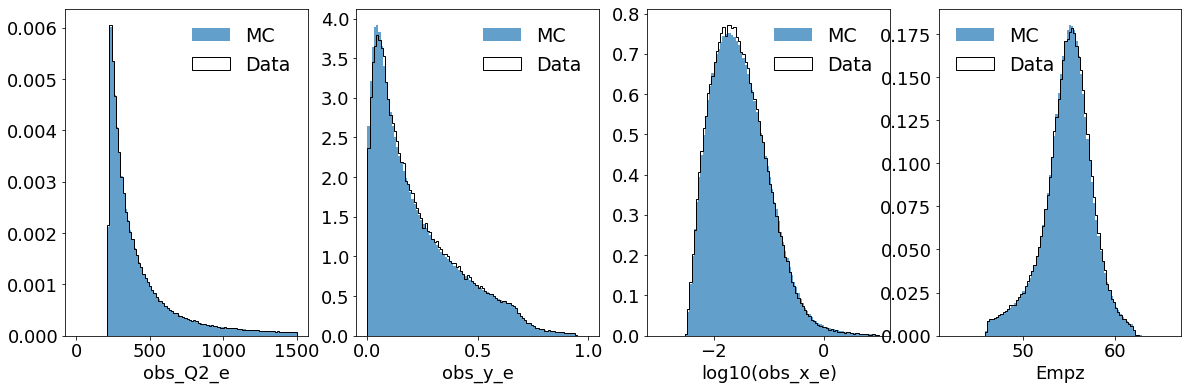

In [8]:
fig,ax = plt.subplots(1,4,figsize=(20,6))

nbins=100
myalpha = 0.7

ax[0].hist( mc_pdf['obs_Q2_e'], bins=nbins, range=[0,1500], label='MC', weights=mc_pdf['wgt'], density=True, alpha=myalpha ) 
ax[0].hist( data_pdf['obs_Q2_e'], bins=nbins, range=[0,1500], histtype='step', color='black', label='Data', density=True )

ax[1].hist( mc_pdf['obs_y_e'], bins=nbins, range=[0,1], label='MC', weights=mc_pdf['wgt'], density=True, alpha=myalpha ) 
ax[1].hist( data_pdf['obs_y_e'], bins=nbins, range=[0,1], histtype='step', color='black', label='Data', density=True ) 

ax[2].hist( np.log10(mc_pdf['obs_x_e']), bins=nbins, range=[-3,1], label='MC', weights=mc_pdf['wgt'], density=True, alpha=myalpha ) 
ax[2].hist( np.log10(data_pdf['obs_x_e']), bins=nbins, range=[-3,1], histtype='step', color='black', label='Data', density=True ) 

ax[3].hist( mc_pdf['Empz'], bins=nbins, range=[42,66], label='MC', weights=mc_pdf['wgt'], density=True, alpha=myalpha ) 
ax[3].hist( data_pdf['Empz'], bins=nbins, range=[42,66], histtype='step', color='black', label='Data', density=True ) 






ax[0].legend(loc='best')
ax[1].legend(loc='best')
ax[2].legend(loc='best')
ax[3].legend(loc='best')

ax[0].set_xlabel('obs_Q2_e')
ax[1].set_xlabel('obs_y_e')
ax[2].set_xlabel('log10(obs_x_e)')
ax[3].set_xlabel('Empz')


plt.savefig( '%s/event-vars.pdf' % plots_dir, bbox_inches='tight' )
plt.savefig( '%s/event-vars.png' % plots_dir, bbox_inches='tight' )

plt.show()

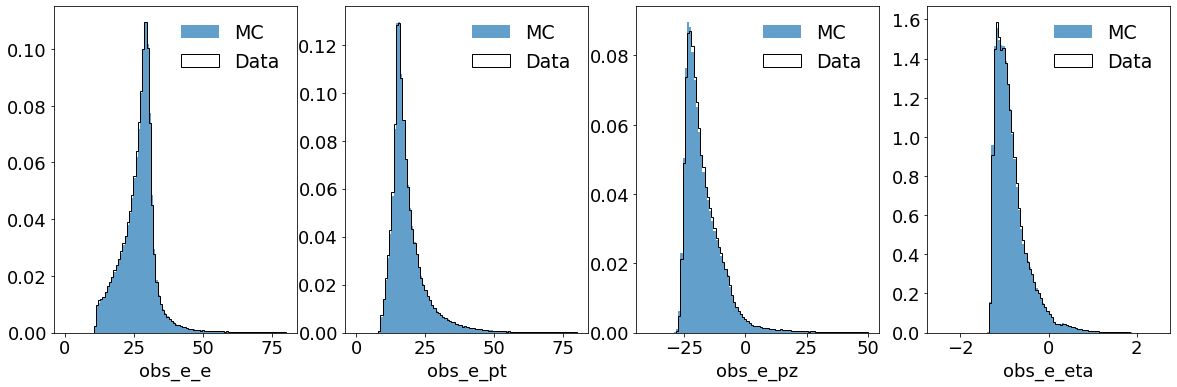

In [9]:
fig,ax = plt.subplots(1,4,figsize=(20,6))

nbins=100
myalpha = 0.7

ax[0].hist( mc_pdf['obs_e_e'], bins=nbins, range=[0,80], weights=mc_pdf['wgt'], label='MC', density=True, alpha=myalpha )
ax[0].hist( data_pdf['obs_e_e'], bins=nbins, range=[0,80], histtype='step', color='black', label='Data', density=True )

ax[1].hist( mc_pdf['obs_e_pt'], bins=nbins, range=[0,80], weights=mc_pdf['wgt'], label='MC', density=True, alpha=myalpha )
ax[1].hist( data_pdf['obs_e_pt'], bins=nbins, range=[0,80], histtype='step', color='black', label='Data', density=True )

ax[2].hist( mc_pdf['obs_e_pz'], bins=nbins, range=[-40,50], weights=mc_pdf['wgt'], label='MC', density=True, alpha=myalpha )
ax[2].hist( data_pdf['obs_e_pz'], bins=nbins, range=[-40,50], histtype='step', color='black', label='Data', density=True )

ax[3].hist( mc_pdf['obs_e_eta'], bins=nbins, range=[-2.5,2.5], weights=mc_pdf['wgt'], label='MC', density=True, alpha=myalpha )
ax[3].hist( data_pdf['obs_e_eta'], bins=nbins, range=[-2.5,2.5], histtype='step', color='black', label='Data', density=True )



ax[0].legend(loc='best')
ax[1].legend(loc='best')
ax[2].legend(loc='best')
ax[3].legend(loc='best')

ax[0].set_xlabel('obs_e_e')
ax[1].set_xlabel('obs_e_pt')
ax[2].set_xlabel('obs_e_pz')
ax[3].set_xlabel('obs_e_eta')

plt.savefig( '%s/dnn-inputs-electron-vars.pdf' % plots_dir, bbox_inches='tight' )
plt.savefig( '%s/dnn-inputs-electron-vars.png' % plots_dir, bbox_inches='tight' )


plt.show()


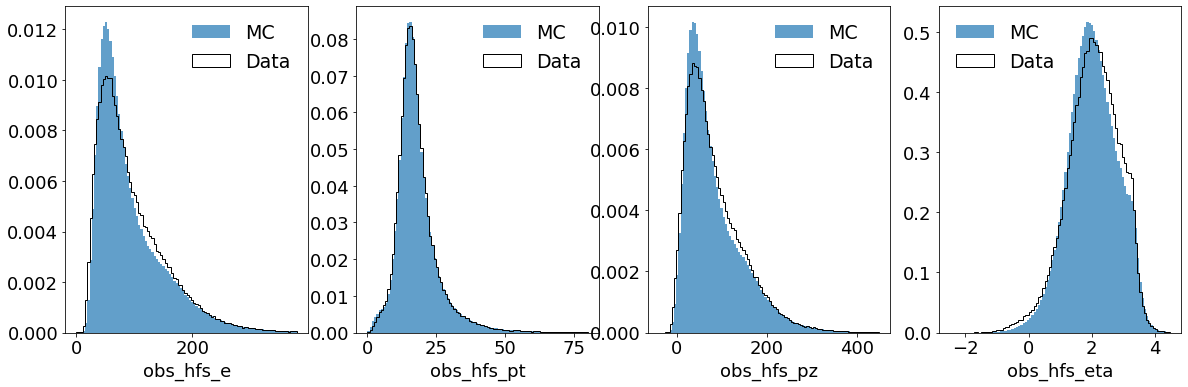

In [10]:
fig,ax = plt.subplots(1,4,figsize=(20,6))

nbins=100
myalpha = 0.7

ax[0].hist( mc_pdf['obs_hfs_e'], bins=nbins, range=[0,380], weights=mc_pdf['wgt'], label='MC', density=True, alpha=myalpha )
ax[0].hist( data_pdf['obs_hfs_e'], bins=nbins, range=[0,380], histtype='step', color='black', label='Data', density=True )

ax[1].hist( mc_pdf['obs_hfs_pt'], bins=nbins, range=[0,80], weights=mc_pdf['wgt'], label='MC', density=True, alpha=myalpha )
ax[1].hist( data_pdf['obs_hfs_pt'], bins=nbins, range=[0,80], histtype='step', color='black', label='Data', density=True )

ax[2].hist( mc_pdf['obs_hfs_pz'], bins=nbins, range=[-40,450], weights=mc_pdf['wgt'], label='MC', density=True, alpha=myalpha )
ax[2].hist( data_pdf['obs_hfs_pz'], bins=nbins, range=[-40,450], histtype='step', color='black', label='Data', density=True )

ax[3].hist( mc_pdf['obs_hfs_eta'], bins=nbins, range=[-2.5,4.5], weights=mc_pdf['wgt'], label='MC', density=True, alpha=myalpha )
ax[3].hist( data_pdf['obs_hfs_eta'], bins=nbins, range=[-2.5,4.5], histtype='step', color='black', label='Data', density=True )



ax[0].legend(loc='best')
ax[1].legend(loc='best')
ax[2].legend(loc='best')
ax[3].legend(loc='best')

ax[0].set_xlabel('obs_hfs_e')
ax[1].set_xlabel('obs_hfs_pt')
ax[2].set_xlabel('obs_hfs_pz')
ax[3].set_xlabel('obs_hfs_eta')


plt.savefig( '%s/dnn-inputs-hfs-vars.pdf' % plots_dir, bbox_inches='tight' )
plt.savefig( '%s/dnn-inputs-hfs-vars.png' % plots_dir, bbox_inches='tight' )



plt.show()



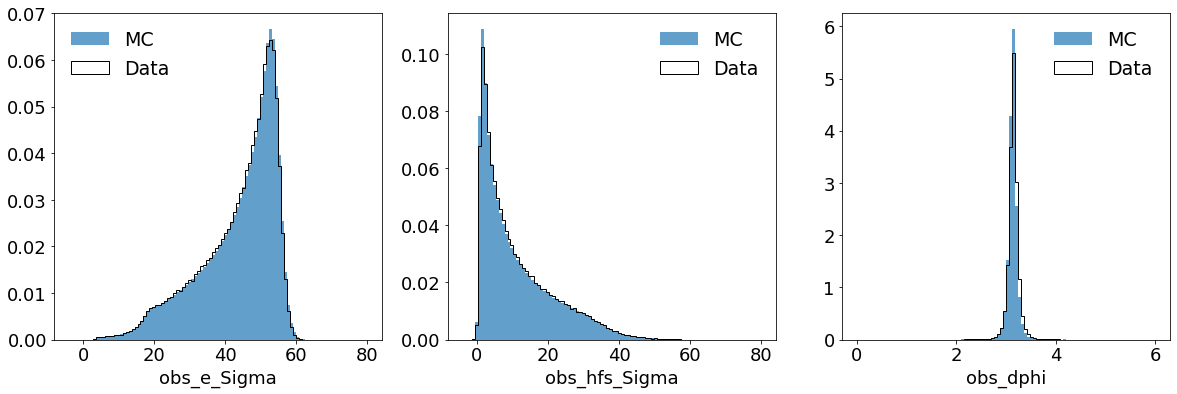

In [11]:
fig,ax = plt.subplots(1,3,figsize=(20,6))

nbins=100
myalpha = 0.7

ax[0].hist( mc_pdf['obs_e_Sigma'], bins=nbins, range=[-4,80], weights=mc_pdf['wgt'], label='MC', density=True, alpha=myalpha )
ax[0].hist( data_pdf['obs_e_Sigma'], bins=nbins, range=[-4,80], histtype='step', color='black', label='Data', density=True )

ax[1].hist( mc_pdf['obs_hfs_Sigma'], bins=nbins, range=[-4,80], weights=mc_pdf['wgt'], label='MC', density=True, alpha=myalpha )
ax[1].hist( data_pdf['obs_hfs_Sigma'], bins=nbins, range=[-4,80], histtype='step', color='black', label='Data', density=True )

ax[2].hist( mc_pdf['obs_dphi'], bins=nbins, range=[0,6], weights=mc_pdf['wgt'], label='MC', density=True, alpha=myalpha )
ax[2].hist( data_pdf['obs_dphi'], bins=nbins, range=[0,6], histtype='step', color='black', label='Data', density=True )


ax[0].legend(loc='best')
ax[1].legend(loc='best')
ax[2].legend(loc='best')


ax[0].set_xlabel('obs_e_Sigma')
ax[1].set_xlabel('obs_hfs_Sigma')
ax[2].set_xlabel('obs_dphi')

plt.savefig( '%s/sigma-dphi.pdf' % plots_dir, bbox_inches='tight' )
plt.savefig( '%s/sigma-dphi.png' % plots_dir, bbox_inches='tight' )






plt.show()


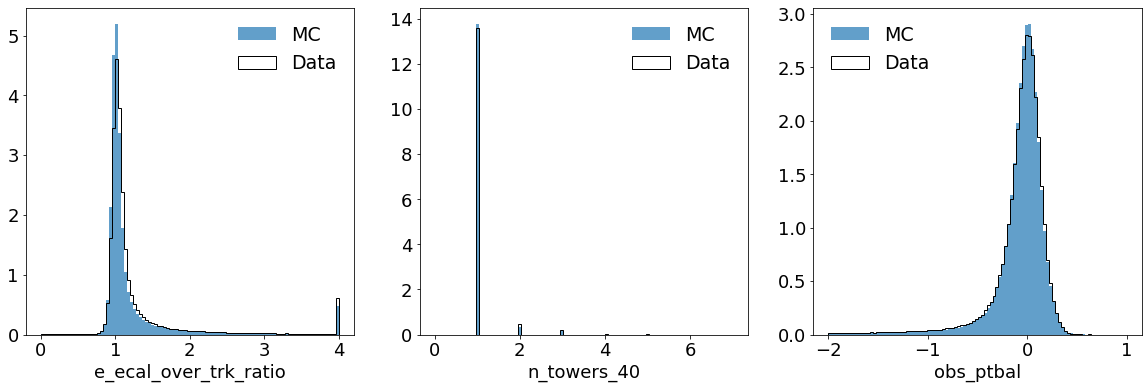

In [12]:
fig,ax = plt.subplots(1,3,figsize=(20,6))

nbins=100
myalpha = 0.7

ax[0].hist( mc_pdf['e_ecal_over_trk_ratio'], bins=nbins, range=[0,4], weights=mc_pdf['wgt'], label='MC', density=True, alpha=myalpha )
ax[0].hist( data_pdf['e_ecal_over_trk_ratio'], bins=nbins, range=[0,4], histtype='step', color='black', label='Data', density=True )

ax[1].hist( mc_pdf['n_towers_40'], bins=nbins, range=[0,7], weights=mc_pdf['wgt'], label='MC', density=True, alpha=myalpha )
ax[1].hist( data_pdf['n_towers_40'], bins=nbins, range=[0,7], histtype='step', color='black', label='Data', density=True )

ax[2].hist( mc_pdf['obs_ptbal'], bins=nbins, range=[-2,1], weights=mc_pdf['wgt'], label='MC', density=True, alpha=myalpha )
ax[2].hist( data_pdf['obs_ptbal'], bins=nbins, range=[-2,1], histtype='step', color='black', label='Data', density=True )




ax[0].legend(loc='best')
ax[1].legend(loc='best')
ax[2].legend(loc='best')


ax[0].set_xlabel('e_ecal_over_trk_ratio')
ax[1].set_xlabel('n_towers_40')
ax[2].set_xlabel('obs_ptbal')


plt.savefig( '%s/dnn-inputs-fsr-vars.pdf' % plots_dir, bbox_inches='tight' )
plt.savefig( '%s/dnn-inputs-fsr-vars.png' % plots_dir, bbox_inches='tight' )






plt.show()




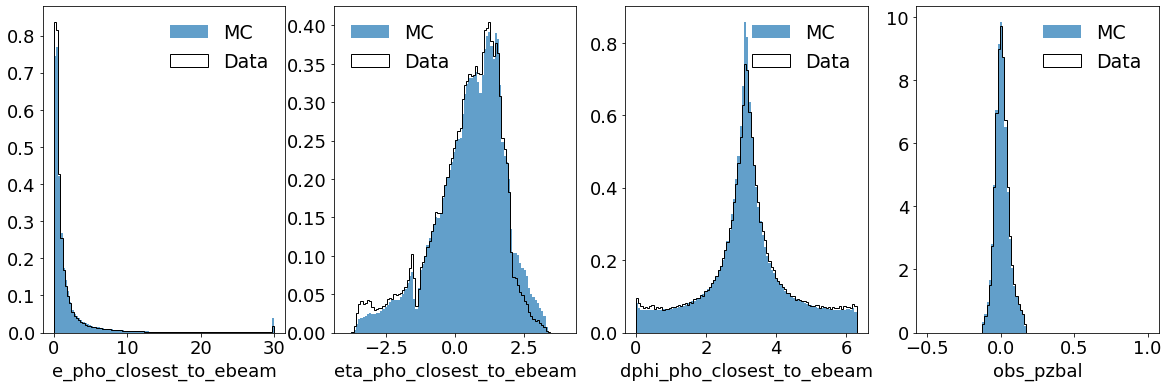

In [13]:
fig,ax = plt.subplots(1,4,figsize=(20,6))

nbins=100
myalpha = 0.7

ax[0].hist( mc_pdf['e_pho_closest_to_ebeam'], bins=nbins, range=[0,30], weights=mc_pdf['wgt'], label='MC', density=True, alpha=myalpha )
ax[0].hist( data_pdf['e_pho_closest_to_ebeam'], bins=nbins, range=[0,30], histtype='step', color='black', label='Data', density=True )

ax[1].hist( mc_pdf['eta_pho_closest_to_ebeam'], bins=nbins, range=[-4,4], weights=mc_pdf['wgt'], label='MC', density=True, alpha=myalpha )
ax[1].hist( data_pdf['eta_pho_closest_to_ebeam'], bins=nbins, range=[-4,4], histtype='step', color='black', label='Data', density=True )

ax[2].hist( mc_pdf['dphi_pho_closest_to_ebeam'], bins=nbins, range=[0,6.3], weights=mc_pdf['wgt'], label='MC', density=True, alpha=myalpha )
ax[2].hist( data_pdf['dphi_pho_closest_to_ebeam'], bins=nbins, range=[0,6.3], histtype='step', color='black', label='Data', density=True )

ax[3].hist( mc_pdf['obs_pzbal'], bins=nbins, range=[-0.5,1], weights=mc_pdf['wgt'], label='MC', density=True, alpha=myalpha )
ax[3].hist( data_pdf['obs_pzbal'], bins=nbins, range=[-0.5,1], histtype='step', color='black', label='Data', density=True )







ax[0].legend(loc='best')
ax[1].legend(loc='best')
ax[2].legend(loc='best')
ax[3].legend(loc='best')

ax[0].set_xlabel('e_pho_closest_to_ebeam')
ax[1].set_xlabel('eta_pho_closest_to_ebeam')
ax[2].set_xlabel('dphi_pho_closest_to_ebeam')
ax[3].set_xlabel('obs_pzbal')

plt.savefig( '%s/dnn-inputs-isr-vars.pdf' % plots_dir, bbox_inches='tight' )
plt.savefig( '%s/dnn-inputs-isr-vars.png' % plots_dir, bbox_inches='tight' )


plt.show()



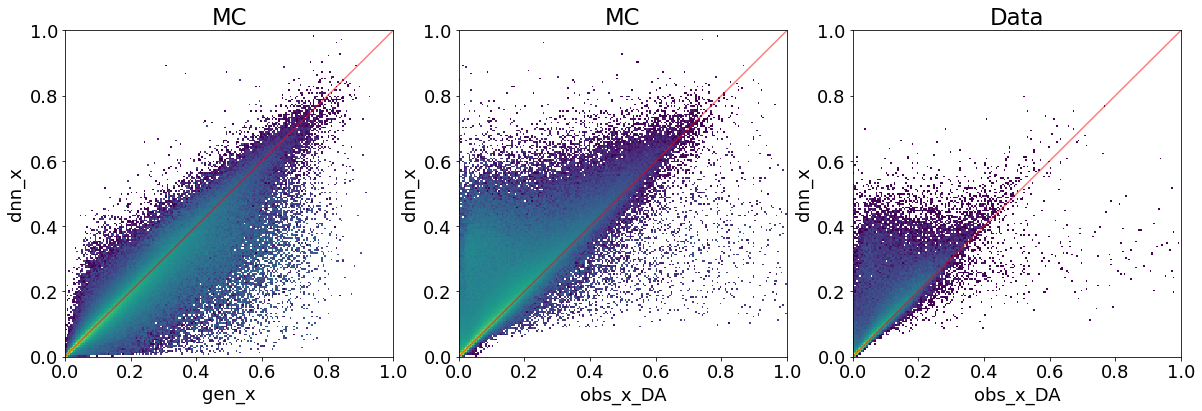

In [14]:
fig,ax = plt.subplots(1,3,figsize=(20,6))

xmin = 0
xmax = 1

ax[0].hist2d( mc_pdf['from_tlv_gen_x'] , mc_pdf['dnn_x'],  weights=mc_pdf['wgt'], density=True, bins=200, range=([xmin,xmax],[xmin,xmax]), norm=mpl.colors.LogNorm() )
ax[0].plot([xmin,xmax],[xmin,xmax], alpha=0.5, color='red')

ax[1].hist2d( mc_pdf['obs_x_DA'] , mc_pdf['dnn_x'],  weights=mc_pdf['wgt'],  density=True, bins=200, range=([xmin,xmax],[xmin,xmax]), norm=mpl.colors.LogNorm() )
ax[1].plot([xmin,xmax],[xmin,xmax], alpha=0.5, color='red')

ax[2].hist2d( data_pdf['obs_x_DA'] , data_pdf['dnn_x'],  density=True, bins=200, range=([xmin,xmax],[xmin,xmax]), norm=mpl.colors.LogNorm() )
ax[2].plot([xmin,xmax],[xmin,xmax], alpha=0.5, color='red')

ax[0].set_xlabel('gen_x')
ax[1].set_xlabel('obs_x_DA')
ax[2].set_xlabel('obs_x_DA')

ax[0].set_ylabel('dnn_x')
ax[1].set_ylabel('dnn_x')
ax[2].set_ylabel('dnn_x')

ax[0].set_title('MC')
ax[1].set_title('MC')
ax[2].set_title('Data')

plt.savefig( '%s/dis-x-2d.pdf' % plots_dir, bbox_inches='tight' )
plt.savefig( '%s/dis-x-2d.png' % plots_dir, bbox_inches='tight' )




plt.show()




/Users/owen/.pyenv/versions/3.8.1/lib/python3.8/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


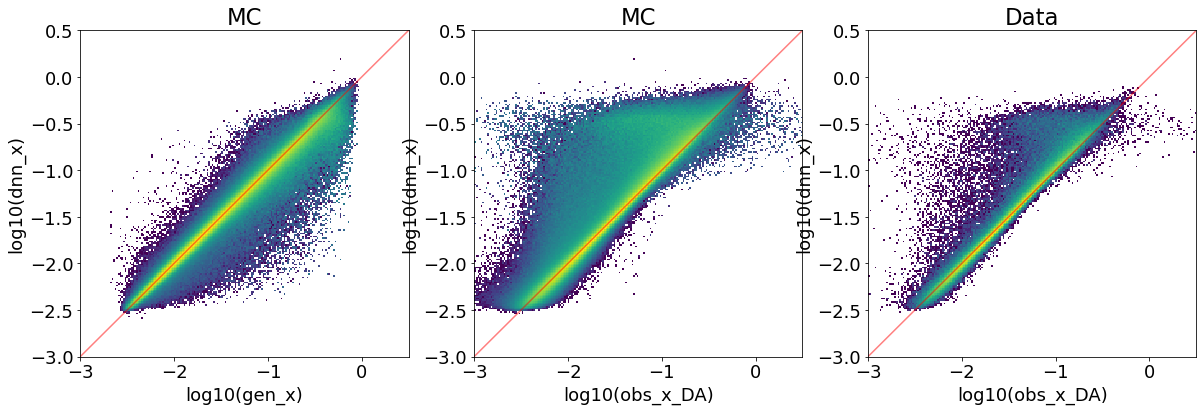

In [15]:
fig,ax = plt.subplots(1,3,figsize=(20,6))

xmin = -3
xmax = 0.5

ax[0].hist2d( np.log10(mc_pdf['from_tlv_gen_x']) , np.log10(mc_pdf['dnn_x']),  weights=mc_pdf['wgt'], density=True, bins=200, range=([xmin,xmax],[xmin,xmax]), norm=mpl.colors.LogNorm() )
ax[0].plot([xmin,xmax],[xmin,xmax], alpha=0.5, color='red')

ax[1].hist2d( np.log10(mc_pdf['obs_x_DA']) , np.log10(mc_pdf['dnn_x']),  weights=mc_pdf['wgt'],  density=True, bins=200, range=([xmin,xmax],[xmin,xmax]), norm=mpl.colors.LogNorm() )
ax[1].plot([xmin,xmax],[xmin,xmax], alpha=0.5, color='red')

ax[2].hist2d( np.log10(data_pdf['obs_x_DA']) , np.log10(data_pdf['dnn_x']),  density=True, bins=200, range=([xmin,xmax],[xmin,xmax]), norm=mpl.colors.LogNorm() )
ax[2].plot([xmin,xmax],[xmin,xmax], alpha=0.5, color='red')


ax[0].set_xlabel('log10(gen_x)')
ax[1].set_xlabel('log10(obs_x_DA)')
ax[2].set_xlabel('log10(obs_x_DA)')

ax[0].set_ylabel('log10(dnn_x)')
ax[1].set_ylabel('log10(dnn_x)')
ax[2].set_ylabel('log10(dnn_x)')

ax[0].set_title('MC')
ax[1].set_title('MC')
ax[2].set_title('Data')

plt.savefig( '%s/dis-log10x-2d.pdf' % plots_dir, bbox_inches='tight' )
plt.savefig( '%s/dis-log10x-2d.png' % plots_dir, bbox_inches='tight' )





plt.show()



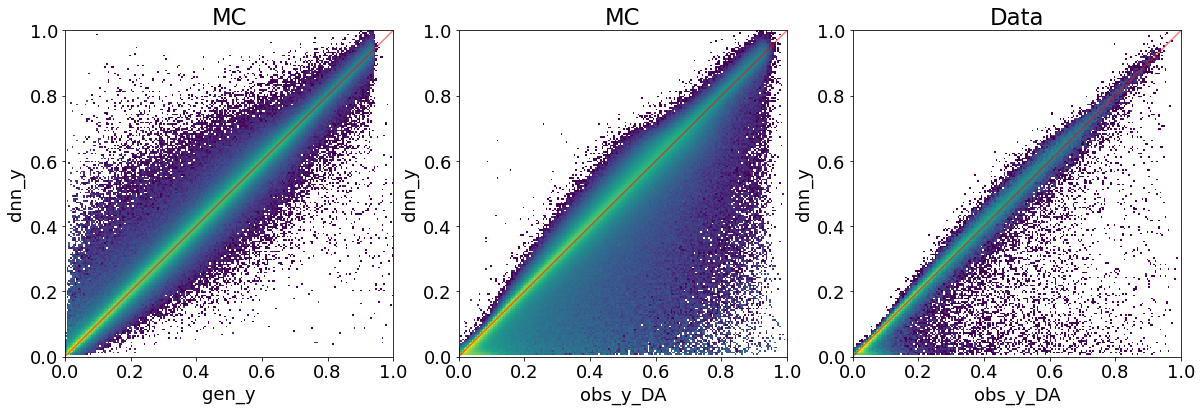

In [16]:
fig,ax = plt.subplots(1,3,figsize=(20,6))

xmin = 0
xmax = 1

ax[0].hist2d( mc_pdf['from_tlv_gen_y'] , mc_pdf['dnn_y'],  weights=mc_pdf['wgt'], density=True, bins=200, range=([xmin,xmax],[xmin,xmax]), norm=mpl.colors.LogNorm() )
ax[0].plot([xmin,xmax],[xmin,xmax], alpha=0.5, color='red')

ax[1].hist2d( mc_pdf['obs_y_DA'] , mc_pdf['dnn_y'],  weights=mc_pdf['wgt'],  density=True, bins=200, range=([xmin,xmax],[xmin,xmax]), norm=mpl.colors.LogNorm() )
ax[1].plot([xmin,xmax],[xmin,xmax], alpha=0.5, color='red')

ax[2].hist2d( data_pdf['obs_y_DA'] , data_pdf['dnn_y'],  density=True, bins=200, range=([xmin,xmax],[xmin,xmax]), norm=mpl.colors.LogNorm() )
ax[2].plot([xmin,xmax],[xmin,xmax], alpha=0.5, color='red')


ax[0].set_xlabel('gen_y')
ax[1].set_xlabel('obs_y_DA')
ax[2].set_xlabel('obs_y_DA')

ax[0].set_ylabel('dnn_y')
ax[1].set_ylabel('dnn_y')
ax[2].set_ylabel('dnn_y')

ax[0].set_title('MC')
ax[1].set_title('MC')
ax[2].set_title('Data')

plt.savefig( '%s/dis-y-2d.pdf' % plots_dir, bbox_inches='tight' )
plt.savefig( '%s/dis-y-2d.png' % plots_dir, bbox_inches='tight' )







plt.show()

/Users/owen/.pyenv/versions/3.8.1/lib/python3.8/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


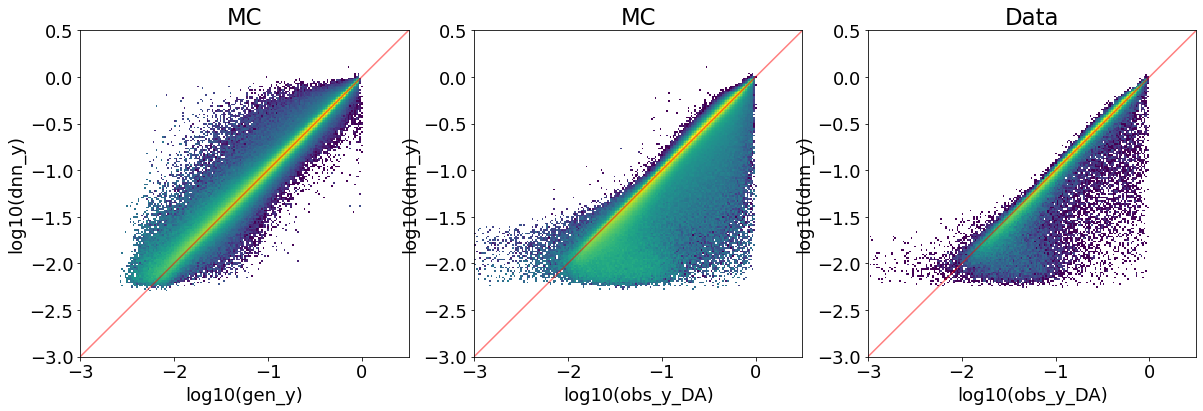

In [17]:
fig,ax = plt.subplots(1,3,figsize=(20,6))

xmin = -3
xmax = 0.5

ax[0].hist2d( np.log10(mc_pdf['from_tlv_gen_y']) , np.log10(mc_pdf['dnn_y']),  weights=mc_pdf['wgt'], density=True, bins=200, range=([xmin,xmax],[xmin,xmax]), norm=mpl.colors.LogNorm() )
ax[0].plot([xmin,xmax],[xmin,xmax], alpha=0.5, color='red')

ax[1].hist2d( np.log10(mc_pdf['obs_y_DA']) , np.log10(mc_pdf['dnn_y']),  weights=mc_pdf['wgt'],  density=True, bins=200, range=([xmin,xmax],[xmin,xmax]), norm=mpl.colors.LogNorm() )
ax[1].plot([xmin,xmax],[xmin,xmax], alpha=0.5, color='red')

ax[2].hist2d( np.log10(data_pdf['obs_y_DA']) , np.log10(data_pdf['dnn_y']),  density=True, bins=200, range=([xmin,xmax],[xmin,xmax]), norm=mpl.colors.LogNorm() )
ax[2].plot([xmin,xmax],[xmin,xmax], alpha=0.5, color='red')


ax[0].set_xlabel('log10(gen_y)')
ax[1].set_xlabel('log10(obs_y_DA)')
ax[2].set_xlabel('log10(obs_y_DA)')

ax[0].set_ylabel('log10(dnn_y)')
ax[1].set_ylabel('log10(dnn_y)')
ax[2].set_ylabel('log10(dnn_y)')

ax[0].set_title('MC')
ax[1].set_title('MC')
ax[2].set_title('Data')


plt.savefig( '%s/dis-log10y-2d.pdf' % plots_dir, bbox_inches='tight' )
plt.savefig( '%s/dis-log10y-2d.png' % plots_dir, bbox_inches='tight' )






plt.show()



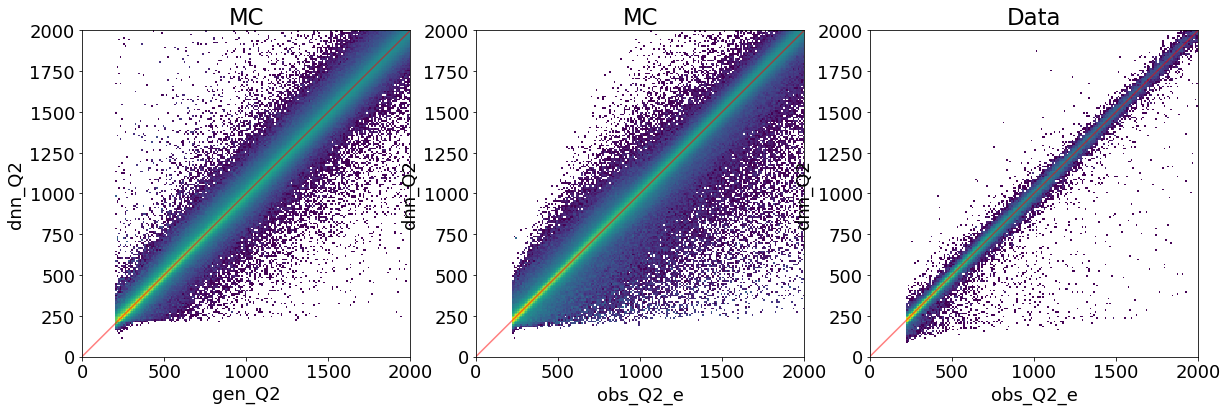

In [21]:
fig,ax = plt.subplots(1,3,figsize=(20,6))

xmin = 0
xmax = 2000

ax[0].hist2d( mc_pdf['from_tlv_gen_Q2'] , mc_pdf['dnn_Q2'],  weights=mc_pdf['wgt'], density=True, bins=200, range=([xmin,xmax],[xmin,xmax]), norm=mpl.colors.LogNorm() )
ax[0].plot([xmin,xmax],[xmin,xmax], alpha=0.5, color='red')

ax[1].hist2d( mc_pdf['obs_Q2_e'] , mc_pdf['dnn_Q2'],  weights=mc_pdf['wgt'],  density=True, bins=200, range=([xmin,xmax],[xmin,xmax]), norm=mpl.colors.LogNorm() )
ax[1].plot([xmin,xmax],[xmin,xmax], alpha=0.5, color='red')

ax[2].hist2d( data_pdf['obs_Q2_e'] , data_pdf['dnn_Q2'],  density=True, bins=200, range=([xmin,xmax],[xmin,xmax]), norm=mpl.colors.LogNorm() )
ax[2].plot([xmin,xmax],[xmin,xmax], alpha=0.5, color='red')


ax[0].set_xlabel('gen_Q2')
ax[1].set_xlabel('obs_Q2_e')
ax[2].set_xlabel('obs_Q2_e')

ax[0].set_ylabel('dnn_Q2')
ax[1].set_ylabel('dnn_Q2')
ax[2].set_ylabel('dnn_Q2')

ax[0].set_title('MC')
ax[1].set_title('MC')
ax[2].set_title('Data')

plt.savefig( '%s/dis-Q2-2d.pdf' % plots_dir, bbox_inches='tight' )
plt.savefig( '%s/dis-Q2-2d.png' % plots_dir, bbox_inches='tight' )






plt.show()

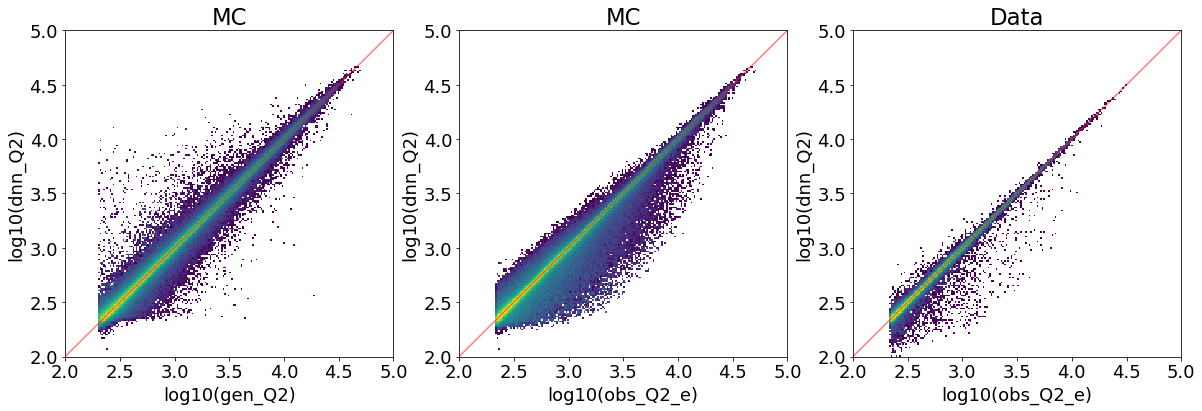

In [20]:
fig,ax = plt.subplots(1,3,figsize=(20,6))

xmin = 2
xmax = 5

ax[0].hist2d( np.log10(mc_pdf['from_tlv_gen_Q2']) , np.log10(mc_pdf['dnn_Q2']),  weights=mc_pdf['wgt'], density=True, bins=200, range=([xmin,xmax],[xmin,xmax]), norm=mpl.colors.LogNorm() )
ax[0].plot([xmin,xmax],[xmin,xmax], alpha=0.5, color='red')

ax[1].hist2d( np.log10(mc_pdf['obs_Q2_e']) , np.log10(mc_pdf['dnn_Q2']),  weights=mc_pdf['wgt'],  density=True, bins=200, range=([xmin,xmax],[xmin,xmax]), norm=mpl.colors.LogNorm() )
ax[1].plot([xmin,xmax],[xmin,xmax], alpha=0.5, color='red')

ax[2].hist2d( np.log10(data_pdf['obs_Q2_e']) , np.log10(data_pdf['dnn_Q2']),  density=True, bins=200, range=([xmin,xmax],[xmin,xmax]), norm=mpl.colors.LogNorm() )
ax[2].plot([xmin,xmax],[xmin,xmax], alpha=0.5, color='red')


ax[0].set_xlabel('log10(gen_Q2)')
ax[1].set_xlabel('log10(obs_Q2_e)')
ax[2].set_xlabel('log10(obs_Q2_e)')

ax[0].set_ylabel('log10(dnn_Q2)')
ax[1].set_ylabel('log10(dnn_Q2)')
ax[2].set_ylabel('log10(dnn_Q2)')

ax[0].set_title('MC')
ax[1].set_title('MC')
ax[2].set_title('Data')


plt.savefig( '%s/dis-log10Q2-2d.pdf' % plots_dir, bbox_inches='tight' )
plt.savefig( '%s/dis-log10Q2-2d.png' % plots_dir, bbox_inches='tight' )





plt.show()


